In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")


<div class="usecase-title">Analyzing Trends in Community Wellbeing using CoMSIS Data</div>
<div class="usecase-authors">Author: Nidhi Kanchepalle</div>

<div class="usecase-level-skill">
    <div class="usecase-level">Level: Intermediate</div>
    <div class="usecase-skill">Skills: Python, Exploratory Data Analysis, Data Visualization</div>
</div>

<div class="usecase-duration">Duration: {90} minutes</div>

---

<div class="usecase-section-header">Scenario</div>

_The City of Melbourne Social Indicators Survey (CoMSIS) has been conducted annually since 2018 to gather valuable insights into the health, well-being, safety, participation, and social connection of communities within the Melbourne Local Government Area. The survey is conducted through  telephone and online channels, it supports the reporting of key municipal outcome indicators as outlined in the Council Plan 2021–2025. These indicators enable the council to assess the impact of existing initiatives and inform the planning of future programs. This use case focuses on analyzing multi-year CoMSIS data (2018–2023) to understand how community sentiment has evolved over time. By uncovering trends and highlighting both high- and low-performing indicators, the analysis provides evidence-based insights to help the City of Melbourne better prioritize and refine its community initiatives._

---

<div class="usecase-section-header">What This Use Case Will Teach You</div>

At the end of this use case, you will be able to:
- Learn how to Load Data using APIs
- Handle missing values and prepare the data for meaningful analysis
- Use grouping, filtering, and aggregation techniques to uncover patterns and trends.
- Create clear, informative visualizations to communicate trends using Matplotlib and Seaborn
- Visualize social indicators over time
- Interpret data to support actionable recommendations for local policy and planning.


<div class="usecase-section-header">Background / Introduction</div>

Understanding the evolving needs and sentiments of a city’s population is essential for designing effective policies and community programs. The City of Melbourne Social Indicators Survey (CoMSIS), introduced in 2018, is conducted annually to gather resident insights across several key areas, including health, safety, well-being, participation, and social connection. The survey is administered through telephone and online methods, ensuring broad accessibility and representation from communities across the Melbourne Local Government Area.

A significant strength of the CoMSIS dataset lies in its ability to segment responses across demographic and geographic lines. The respondent_group column captures detailed subgroup information such as age brackets (e.g., 18–24 years, 65+ years) and residential locations (e.g., Docklands 3008, Carlton 3053). This enables a more nuanced understanding of how different segments of the population experience life in the city.

The result column holds the core measurement for each indicator, typically expressed as a percentage or average score depending on the nature of the question. This value allows us to quantify community sentiment and track how it evolves over time. When analyzed across multiple years, these results offer valuable insights into long-term trends, shifts in public opinion, and the effectiveness of previous council initiatives.

By bringing together CoMSIS data from 2018 through 2023, this use case aims to identify trends in community well-being. The analysis also explores differences across various respondent groups, providing the council with a clearer picture of which populations are thriving and which may require more targeted support. Ultimately, this kind of multi-year, group-level insight enables the City of Melbourne to refine its initiatives more effectively, ensuring they are inclusive, equitable, and aligned with the experiences of its diverse communities. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

##  Importing Data Through API

In [3]:


# Reading API key from a file
with open("API_Key.txt", "r", encoding="utf-8-sig") as f:
    API_KEY = f.read().strip()


# Defining function to fetch dataset using the API key
def API_upload(dataset_key):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    full_url = f'{base_url}{dataset_key}/exports/{format}'

    params = {
        'select': '*',
        'timezone': 'UTC',
        'lang': 'en',
        'limit': '-1'
    }

    headers = {
        'X-App-Token': API_KEY
    }

    response = requests.get(full_url, params=params, headers=headers)
    if response.status_code == 200:
        content = response.content.decode('utf-8')
        df = pd.read_csv(StringIO(content), delimiter=';')
        df['SOURCE_DATASET'] = dataset_key
        return df
    else:
        print(f"Error fetching data from {full_url}: {response.status_code}")
        return pd.DataFrame()

# Dataset IDs
datasets = [
    'social-indicators-for-city-of-melbourne-residents-2018',
    'social-indicators-for-city-of-melbourne-residents-2019',
    'social-indicators-for-city-of-melbourne-residents-2020',
    'social-indicators-for-city-of-melbourne-residents-2021',
    'social-indicators-for-city-of-melbourne-residents-2022',
    'social-indicators-for-city-of-melbourne-residents-2023'
]

# Load and combine
all_data = [API_upload(d) for d in datasets]
df_all_years = pd.concat(all_data, ignore_index=True)


##  Inspecting Data

In [4]:
print("\nCombined Dataset Shape:", df_all_years.shape)
print(df_all_years.head())


Combined Dataset Shape: (3918, 12)
  indicator                    type              topic  \
0         1  Council Plan Indicator  Physical activity   
1         1  Council Plan Indicator  Physical activity   
2         1  Council Plan Indicator  Physical activity   
3         1  Council Plan Indicator  Physical activity   
4         1  Council Plan Indicator  Physical activity   

                                 description  \
0  Participate in adequate physical activity   
1  Participate in adequate physical activity   
2  Participate in adequate physical activity   
3  Participate in adequate physical activity   
4  Participate in adequate physical activity   

                                            response  year  \
0  Yes, 30 minutes or more on 4 or more days per ...  2018   
1  Yes, 30 minutes or more on 4 or more days per ...  2018   
2  Yes, 30 minutes or more on 4 or more days per ...  2018   
3  Yes, 30 minutes or more on 4 or more days per ...  2018   
4  Yes, 30 minut

## Deleting unwanted columns

In [5]:
df = pd.DataFrame(df_all_years)
df.drop(columns=['SOURCE_DATASET', 'respondent_group0'], inplace=True)
df.columns

Index(['indicator', 'type', 'topic', 'description', 'response', 'year',
       'respondent_group', 'sample_size', 'result', 'format'],
      dtype='object')

In [6]:
df

,indicator,type,topic,description,response,year,respondent_group,sample_size,result,format
0,1,Council Plan Indicator,Physical activity,Participate in adequate physical activity,"Yes, 30 minutes or more on 4 or more days per ...",2018,East Melbourne 3002,79,57.7,Per cent
1,1,Council Plan Indicator,Physical activity,Participate in adequate physical activity,"Yes, 30 minutes or more on 4 or more days per ...",2018,Melbourne 3000,264,55.0,Per cent
2,1,Council Plan Indicator,Physical activity,Participate in adequate physical activity,"Yes, 30 minutes or more on 4 or more days per ...",2018,18-24 years,259,52.5,Per cent
3,1,Council Plan Indicator,Physical activity,Participate in adequate physical activity,"Yes, 30 minutes or more on 4 or more days per ...",2018,55-64 years,142,58.7,Per cent
4,1,Council Plan Indicator,Physical activity,Participate in adequate physical activity,"Yes, 30 minutes or more on 4 or more days per ...",2018,65+ years,270,58.9,Per cent
...,...,...,...,...,...,...,...,...,...,...
3913,9,Other,Quality of life,Satisfaction with life as a whole,Average satisfaction score (from 0-100),2023,65+ years,202,80.6,Average
3914,9,Other,Quality of life,Satisfaction with life as a whole,Average satisfaction score (from 0-100),2023,Carlton 3053,192,69.3,Average
3915,9,Other,Quality of life,Satisfaction with life as a whole,Average satisfaction score (from 0-100),2023,City of Melbourne,1369,72.7,Average
3916,9,Other,Quality of life,Satisfaction with life as a whole,Average satisfaction score (from 0-100),2023,East Melbourne 3002,69,78.7,Average


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indicator         3918 non-null   object 
 1   type              3918 non-null   object 
 2   topic             3918 non-null   object 
 3   description       3918 non-null   object 
 4   response          3918 non-null   object 
 5   year              3918 non-null   int64  
 6   respondent_group  3254 non-null   object 
 7   sample_size       3918 non-null   int64  
 8   result            3918 non-null   float64
 9   format            3918 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 306.2+ KB


## Checking for missing values

In [8]:
missing_values = df.isna().sum()

# displaying columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
respondent_group    664
dtype: int64


## Handling Missing Values

In this step, we address missing values in the respondent_group column. Since there are a significant number of null entries (664), and the survey is conducted within the City of Melbourne, we fill these missing values with 'City of Melbourne'. This approach ensures consistency in the dataset and prevents the loss of valuable records during analysis, particularly when grouping or comparing data across respondent groups.

In [9]:
df['respondent_group'].fillna('City of Melbourne', inplace=True)

In [10]:
#verifying if all missing values are handled
missing_values = df.isna().sum()

print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


## Exploratory Data Analysis

In [11]:
#Verifying standardisation of values for format column
df['format'].unique()

array(['Per cent', 'Average'], dtype=object)

In [12]:
# Count the number of unique topics covered in the CoMSIS survey
num_topics= df['topic'].nunique()
print(f"Number of distinct indicators: {num_topics}")

# Display all unique topics
print("\nUnique indicator values:")
print(df['topic'].unique())

# Count the number of various respondent_groups participated in the CoMSIS survey
num_groups = df['respondent_group'].nunique()
print(f"\nNumber of distinct respondent groups: {num_groups}")

# Display all unique respondent groups
print("\nUnique respondent groups:")
print(df['respondent_group'].unique())


Number of distinct indicators: 14

Unique indicator values:
['Physical activity' 'Health' 'Decision making' 'Food security'
 'Perceptions of safety' 'Volunteering' 'Subjective wellbeing'
 'Quality of life' 'Tolerance of diversity' 'Arts and cultural activities'
 'Learning' 'Relationship with Aboriginal people'
 'Food production and consumption' 'Knowledge of Aboriginal culture']

Number of distinct respondent groups: 27

Unique respondent groups:
['East Melbourne 3002' 'Melbourne 3000' '18-24 years' '55-64 years'
 '65+ years' 'Carlton 3053' '25-34 years' '35-44 years' '45-54 years'
 'City of Melbourne' 'Docklands 3008' 'Kensington/ Flemingon 3031'
 'North Melbourne 3051 / West Melbourne 3003' 'Parkville 3052'
 'Southbank/ South Wharf 3006'
 'South Yarra 3141 / Melbourne (St Kilda Road) 3004' 'Male' 'Female'
 'South Yarra 3141 / Melbourne/St Kilda Road 3004'
 'Kensington / Flemington 3031' 'South Wharf / Southbank 3006' '18-24'
 '35-44' '45-54' '65+' '25-34' '55-64']


In [13]:
# most common respondent groups
df['respondent_group'].value_counts().head(5)

respondent_group
City of Melbourne      843
East Melbourne 3002    181
Female                 181
Male                   181
Melbourne 3000         181
Name: count, dtype: int64

In [14]:
# Filtering only rows where the format is 'Per cent'
df_percent = df[df['format'].str.lower() == 'per cent']

# Grouping by topic and calculating average result
topic_avg_result = df_percent.groupby('topic')['result'].mean().reset_index()
top5_topics_percent = topic_avg_result.sort_values(by='result', ascending=False).head(5)

# top 5 topics 
print("Top 5 topics with the highest average result (Percentage format only):")
print(top5_topics_percent)

# Display unique responses for each of the top 5 topics
print("\nUnique responses for each of the top 5 topics:")
for topic in top5_topics_percent['topic']:
    unique_responses = df_percent[df_percent['topic'] == topic]['response'].unique()
    print(f"\nTopic: {topic}")
    for response in unique_responses:
        print(f" - {response}")

Top 5 topics with the highest average result (Percentage format only):
                                  topic     result
10               Tolerance of diversity  94.103704
9   Relationship with Aboriginal people  93.945370
6                              Learning  73.730000
7                 Perceptions of safety  72.387963
2       Food production and consumption  61.936667

Unique responses for each of the top 5 topics:

Topic: Tolerance of diversity
 - Reported as strongly agree or agree

Topic: Relationship with Aboriginal people
 - Reported as very important or important

Topic: Learning
 - Yes, in the last 12 months

Topic: Perceptions of safety
 - Reported as feeling very safe or safe

Topic: Food production and consumption
 - Yes, in the last 12 months


In [15]:
least5_topics_percent = topic_avg_result.sort_values(by='result', ascending=False).tail(6)

# 5 topics with least percentage
print("Top 5 topics with the lowest average result (Percentage format only):")
print(least5_topics_percent)

print("\nUnique responses for each of the least 5 topics:")
for topic in least5_topics_percent['topic']:
    unique_responses = df_percent[df_percent['topic'] == topic]['response'].unique()
    print(f"\nTopic: {topic}")
    for response in unique_responses:
        print(f" - {response}")

Top 5 topics with the lowest average result (Percentage format only):
                              topic     result
4                            Health  37.597222
8                 Physical activity  37.063131
11                     Volunteering  30.095833
3                     Food security  17.964957
0      Arts and cultural activities  16.772222
5   Knowledge of Aboriginal culture   9.225000

Unique responses for each of the least 5 topics:

Topic: Health
 - Reported as excellent or very good
 - Reported as smoke daliy or smoke occassionally
 - Reported as vape daliy or vape occassionally

Topic: Physical activity
 - Yes, 30 minutes or more on 4 or more days per week
 - Yes, in the last 3 months

Topic: Volunteering
 - Yes, in the last 12 months

Topic: Food security
 - Yes, in the last 12 months

Topic: Arts and cultural activities
 - Yes, in the last 3 months

Topic: Knowledge of Aboriginal culture
 - Able to name both Wurundjeri and Boonwurrung
 - Reported as very high or fairly

Analyzing the above results has provided valuable insights into the key pain points affecting residents. Based on these findings, we can now focus further exploration on topics such as health, food security, and physical activity, as they have a direct impact on the overall health and well-being of people living in Melbourne. Additionally, the low levels of awareness around Aboriginal culture highlight a significant gap in cultural understanding, suggesting the need for enhanced education and engagement initiatives across the city.



## Analyzing Trends in Smoking and Vaping Behavior

In [20]:
target_responses = [
    "Reported as smoke daliy or smoke occassionally",
    "Reported as vape daliy or vape occassionally"
]

df[df['response'].isin(target_responses)]

,indicator,type,topic,description,response,year,respondent_group,sample_size,result,format
2658,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,2022,35-44 years,238,10.9,Per cent
2659,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,2022,45-54 years,121,15.4,Per cent
2660,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,2022,City of Melbourne,1488,14.1,Per cent
2661,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,2022,Docklands 3008,124,13.1,Per cent
2662,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,2022,East Melbourne 3002,90,3.8,Per cent
...,...,...,...,...,...,...,...,...,...,...
3721,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,2023,45-54 years,128,8.1,Per cent
3722,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,2023,55-64 years,115,3.7,Per cent
3723,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,2023,Carlton 3053,191,17.3,Per cent
3724,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,2023,Kensington / Flemington 3031,89,10.0,Per cent


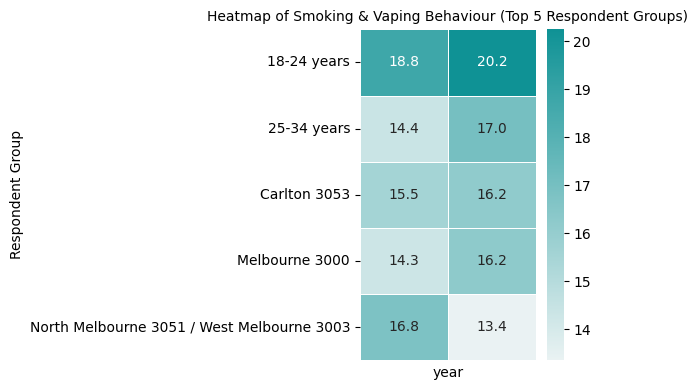

In [26]:


smoke_vape_df = df[df['response'].isin(target_responses)]

#Indentifying the top 5 respondent groups with the highest average result
top5_smoke_vape_groups = (
    smoke_vape_df.groupby('respondent_group')['result']
    .mean()
    .reset_index()
    .sort_values(by='result', ascending=False)
    .head(5)
)

top5_groups = top5_smoke_vape_groups['respondent_group']
df_top5 = smoke_vape_df[smoke_vape_df['respondent_group'].isin(top5_groups)]
heatmap_data = df_top5.groupby(['respondent_group', 'year'])['result'].mean().unstack()

#Customising color palette
custom_cmap = sns.light_palette("#0f9295", as_cmap=True)


plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=custom_cmap, linewidths=0.5)


plt.xticks([], [])
plt.ylabel("Respondent Group")
plt.title("Heatmap of Smoking & Vaping Behaviour (Top 5 Respondent Groups)", fontsize=10)
plt.tight_layout()
plt.show()


In [27]:
summary = (
    df_top5.groupby('respondent_group')
    .agg(
        avg_sample_size=('sample_size', 'mean'),
        avg_result=('result', 'mean')
    )
    .reset_index()
)

#Calculate the actual number of people who reported smoking/vaping behaviour
summary['Reported_count'] = (summary['avg_result'] / 100) * summary['avg_sample_size']


summary = summary.sort_values(by='avg_result', ascending=False)
print(summary)


                             respondent_group  avg_sample_size  avg_result  \
0                                 18-24 years            340.0      19.500   
2                                Carlton 3053            182.5      15.875   
1                                 25-34 years            443.0      15.700   
3                              Melbourne 3000            349.0      15.275   
4  North Melbourne 3051 / West Melbourne 3003            223.0      15.075   

   Reported_count  
0       66.300000  
2       28.971875  
1       69.551000  
3       53.309750  
4       33.617250  


From the heatmap, it is evident that the 18–24 age group reports the highest levels of smoking and vaping behavior, with a slight increase observed between 2022 and 2023. This trend highlights a significant area of concern, particularly among younger adults. In addition to age-based insights, specific suburbs such as North Melbourne 3051, West Melbourne 3003, and Carlton 3053 also show consistently high reported rates. To quantify the issue, 66 out of 340 respondents aged 18–24 reported smoking or vaping behavior, reflecting a substantial proportion of that demographic. These findings suggest that the City of Melbourne could benefit from implementing targeted health initiatives and awareness campaigns in both the affected age group and high-risk localities to help reduce the growing rate of smoking and vaping.

## Analyzing Trends in Knowledge of Aboriginal Culture in the City of Melbourne

In [28]:
aboriginal_df = df[df['topic'].str.lower() == 'knowledge of aboriginal culture']

# Get unique descriptions for the topic 'knowledge of aboriginal culture' to understand the survey
unique_descriptions = aboriginal_df['description'].unique()


print("Descriptions under the topic 'Knowledge of Aboriginal culture':")
for desc in unique_descriptions:
    print(f"- {desc}")


Descriptions under the topic 'Knowledge of Aboriginal culture':
- Aware of traditional owners of Melbourne
- Self assessment of Aboriginal and Torrest Strait Islander people histories and cultures


In [29]:
aboriginal_df = df[
    (df['topic'].str.lower() == 'knowledge of aboriginal culture') &
    (df['format'].str.lower() == 'per cent')
].copy()

summary_ab = (
    aboriginal_df.groupby('respondent_group')
    .agg(
        avg_sample_size=('sample_size', 'mean'),
        avg_result=('result', 'mean')
    )
    .reset_index()
)

# Estimate the number of respondents who did not report knowledge of Aboriginal culture
summary_ab['Not aware'] = summary_ab['avg_sample_size'] - ((summary_ab['avg_result'] / 100) * summary_ab['avg_sample_size'])


summary_ab = summary_ab.sort_values(by='avg_result', ascending=False)
summary_ab = summary_ab.round({
    'avg_sample_size': 0,
    'avg_result': 2,
    'Reported_count': 0
})

print("Estimated awareness of Aboriginal culture by respondent group:")
print(summary_ab)


Estimated awareness of Aboriginal culture by respondent group:
                                     respondent_group  avg_sample_size  \
3                                         45-54 years            123.0   
11                       Kensington / Flemington 3031            110.0   
4                                         55-64 years            116.0   
9                                 East Melbourne 3002             86.0   
15         North Melbourne 3051 / West Melbourne 3003            214.0   
19    South Yarra 3141 / Melbourne/St Kilda Road 3004            119.0   
5                                           65+ years            203.0   
2                                         35-44 years            195.0   
6                                        Carlton 3053            154.0   
8                                      Docklands 3008            113.0   
16                                     Parkville 3052             88.0   
0                                         18-24 y

From the above results, it is evident that knowledge of Aboriginal culture remains consistently low across all respondent groups in the City of Melbourne. This suggests that cultural awareness is a widespread gap, regardless of age, gender, or residential location. Given the significance of acknowledging and respecting Aboriginal heritage, this finding highlights a clear opportunity for local government and councils to take proactive initiatives.

Some potential initiatives could include:

-Partnering with local Aboriginal communities to co-create public events, workshops, or storytelling sessions

-Developing cultural awareness campaigns across schools, universities, and workplaces

-Installing more visible Aboriginal art, language, and signage in public spaces

These actions could help foster deeper understanding, strengthen cultural respect, and contribute to a more inclusive community.